<a href="https://colab.research.google.com/github/roshanappa/Time-Series-Analysis-/blob/master/Time_Series_analysis_with_ARIMA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from zipfile import ZipFile

In [ ]:
file_name = '/content/64789_128364_bundle_archive.zip'

In [ ]:
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
data = pd.read_csv('/content/daily-total-female-births-CA.csv')

In [ ]:
data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
data.tail()

,date,births
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


In [ ]:
round(data.describe(),1)

,births
count,365.0
mean,42.0
std,7.3
min,23.0
25%,37.0
50%,42.0
75%,46.0
max,73.0


In [ ]:
data.isnull().sum()

date      0
births    0
dtype: int64

In [ ]:
data.dtypes

date      object
births     int64
dtype: object

# Data Transformation.

In [ ]:
data['date'].dtypes

dtype('O')

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data['date'].head()

0   1959-01-01
1   1959-01-02
2   1959-01-03
3   1959-01-04
4   1959-01-05
Name: date, dtype: datetime64[ns]

# Data Visualization.


In [ ]:
data.set_index(data['date'],drop=True,inplace=True)

In [ ]:
data.drop(columns=['date'],inplace=True)

In [ ]:
data.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


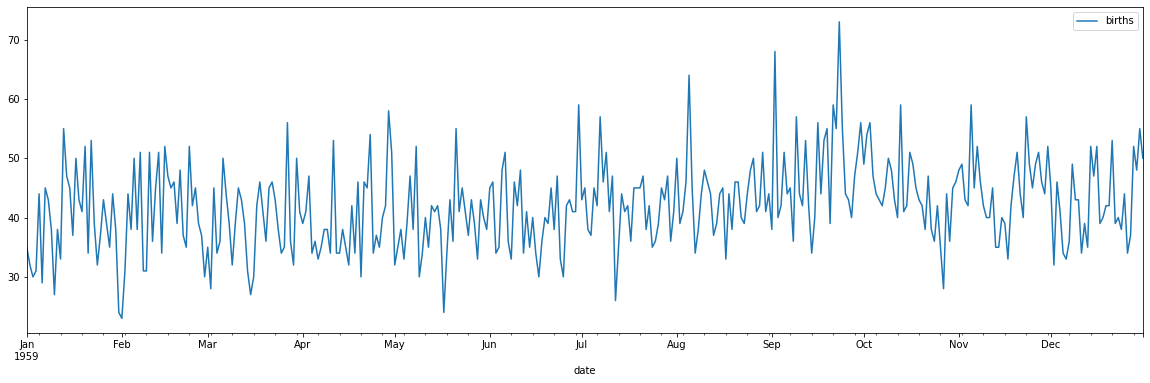

In [ ]:
data.plot(kind='line',figsize=(20,6))
plt.show()

since,data is not looking as seasonal so from that we can say it is the stationary data but we will see the some proof.



In [ ]:
df_birth_mean = data.rolling(window=20).mean()

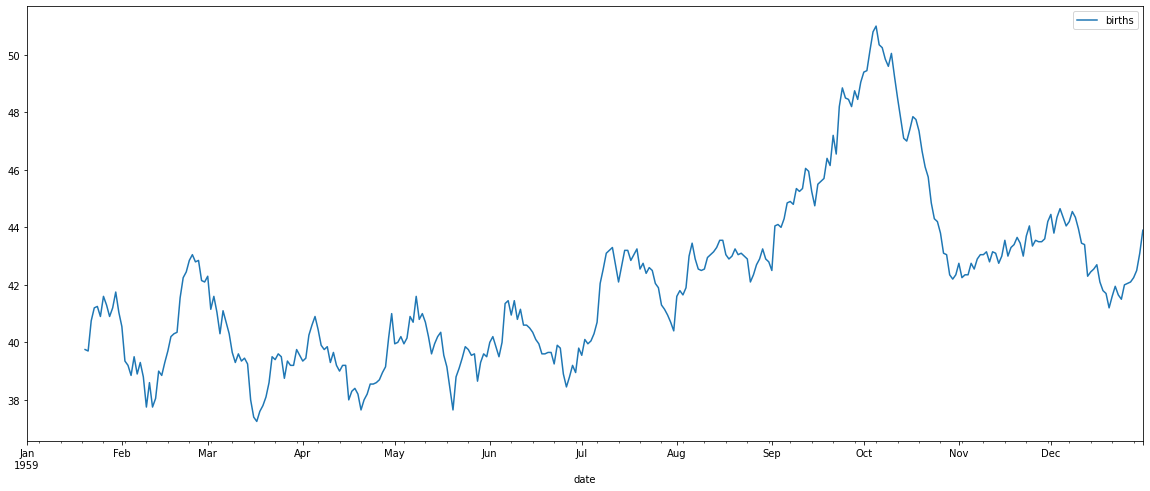

In [ ]:
df_birth_mean.plot(figsize=(20,8))
plt.show()

From the above we got the clear idea that it is not seasonal data.If yoou see the data not having certain pattern.If you compare the  original and 20 days rollling series (moving avarage) kind of thing .There we will crystal idea we can not say it having the any ups and down in  the particular season.We can do log transformation and normal transformation on the data but now are just handeling small data so it doesn't matter over here.



According to ARIMA model methodology,the privious history is best to create the prediction on the upcoming days.We are going to use the previous values for the prediction of future value.so for that we will give over here one shift.

In [ ]:
data['births'].shift(1)  #we can cleary see the value are getting shifted by one day.

date
1959-01-01     NaN
1959-01-02    35.0
1959-01-03    32.0
1959-01-04    30.0
1959-01-05    31.0
              ... 
1959-12-27    34.0
1959-12-28    37.0
1959-12-29    52.0
1959-12-30    48.0
1959-12-31    55.0
Name: births, Length: 365, dtype: float64

In [ ]:
data['Forecated_births'] = data['births'].shift(1)

In [ ]:
data.head()

,births,Forecated_births
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


# Diffreces Or Integration..

We are going use the mean squared error in order to get the error.


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
data1 = data.dropna()

In [ ]:
data1.head()

,births,Forecated_births
date,,
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0
1959-01-06,29,44.0


In [ ]:
birth_error = mean_squared_error(data1['births'],data1['Forecated_births'])

In [ ]:
birth_error

84.22252747252747

In [ ]:
np.sqrt(birth_error)

9.177283229394606

In this way, we have calculated the mean squared error in order to get the error in between the actual and prdicted.In the above way we can say 9.17 is the error.If we use any further algorithm we should have errror less than this one i.e. **9.17**. It means the if you use the advance AR,expontial or ARIMA your model should have the mean_squared_error less than 9.17.But the finally we are taking all of this things in the ARIMA.It stand for the **Auto-Regressive Integrated Moving Avarage.** Moving avarage is the smoothing part how through which we can remove the errors and noise from data.It does the correlation in such that the current value will correlated with previous value.The privious is the best reflection of the current value.It shows how well the values are related each other.It is known as parameter p.
Integrated is the nothing but the order of the diffrence.
e.g. Intialy we want the stationary time series.To get the time series in Stationary format where the Standard Deviation and mean will be the costant throughout the series.For the getting the seasonal series into the Stationary series we have to use some certain opertaion by using the shit and all.It is also known as parameter d.

It to removing the error which is present actaul searies and return the seris in the stationary format.

So by doing this we will get the stationary searies this is happen due to the ordering on the series.It takes the always diffrence in between the actul and predicted values in order one simlary happen with order two.mostly we just upto the order 1 and 2.

For the Moving-Avarage (q) and AutoRegressive we need the some ACF (Atual auto_correlation) and PACF(Partial Auto Correlation).

It will gives us better understanding of data.





# To Check Staionary or not.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result = adfuller(data['births'])

In [ ]:
adf_score,pvalue,usedlag,nobs,critical_values,icbest = test_result

Null_hypothesis = Ho = data is not stationary
Alternative = H1 = data is  stationary.

In [ ]:
def is_stationary(p_values):
  if p_values >= 0.05:
    print('It is Weakly recommending that it is Null Hypothesis.It means that data is not stationary.')
  else:
    print('This is Strongly recommending that it is Alternative Hypothesis.It means that data is stationary.')

In [ ]:
is_stationary(pvalue)

This is Strongly recommending that it is Alternative Hypothesis.It means that data is stationary.


# Build The Advance Model.

ARIMA contains Autoregression (p),Integrated (d) and Moving avarage (q).

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

## Actual Auto-correlation 

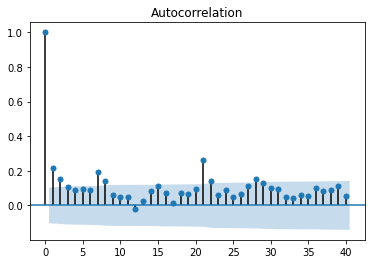

Plot_acf it help us to get the value of p


In [ ]:
#plot_acf is to identify parameter Q
# ARIMA (P,D,Q) HERE D = because we already know that D is the data is stationary and integrated_difference is zero.Q will identify with the help of the plot_acf. 
plot_acf(data['births'],lags=40,)
plt.show()

#From the below we can undertstand that the there is something at lag one is showing the 1 as autocorrelation that means the they pefectly match together themselves.
#But after the one that 2 there is something 0.2 we have at lag 2 there is some correlation  and 3 also some correlation but at the 3 lag there is correlation is under the critical region.
#so we are considering this lag. 
print('Plot_acf it help us to get the value of p')

##  Partial Auto-Correlation

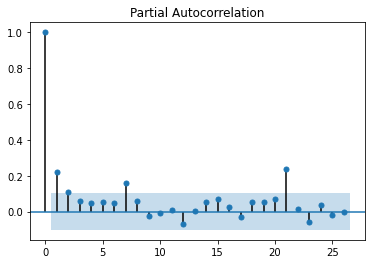

Plot_pacf is help us to determine the value of Q


In [ ]:
plot_pacf(data['births'])
plt.show()
print('Plot_pacf is help us to determine the value of Q')
#here we can see the upto the 1 .It is not going the critical region so we can use it.

In [ ]:
print('ARIMA with P,D,Q respectively p value {} ,D value {} and Q value {}.'.format(2,0,2))

ARIMA with P,D,Q respectively p value 2 ,D value 0 and Q value 2.


# Create The ARIMA Model.

In [ ]:
data.drop(columns=['Forecated_births'],inplace=True)

In [ ]:
data.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [ ]:
data1.head()

,births,Forecated_births
date,,
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0
1959-01-06,29,44.0


Create the Train and Test split of the data.

In [ ]:
data.shape

(365, 1)

In [ ]:
data_train =data[:310]
data_test  =data[310:]

In [ ]:
data_train[-1:]

,births
date,
1959-11-06,45


In [ ]:
data_train.shape,data_test.shape

((310, 1), (55, 1))

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
Arima_model = ARIMA(data_train,order=(2,1,1))    #There is bit of seasonality we have to take d=1

In [ ]:
Arima_model_fit = Arima_model.fit()

In [ ]:
Arima_model_fit.aic #akike information criteria with this we will get the value.The model will gives the lesser aic number that model is good.
# else we need to chose the parameter in order to get the less values that are the P,D,Q.

2100.0222132215586

In [ ]:
data_forecast = Arima_model_fit.forecast(steps=55)[0]  #test and steps shoud have the same number of indexes.

In [ ]:
data_forecast

array([46.47287875, 45.87516635, 45.9104323 , 45.90234453, 45.92495599,
       45.94868681, 45.97428092, 46.00015472, 46.02616621, 46.05220949,
       46.07826425, 46.10432213, 46.13038102, 46.1564402 , 46.18249948,
       46.20855878, 46.23461809, 46.2606774 , 46.28673672, 46.31279603,
       46.33885534, 46.36491466, 46.39097397, 46.41703329, 46.4430926 ,
       46.46915192, 46.49521123, 46.52127055, 46.54732986, 46.57338917,
       46.59944849, 46.6255078 , 46.65156712, 46.67762643, 46.70368575,
       46.72974506, 46.75580438, 46.78186369, 46.807923  , 46.83398232,
       46.86004163, 46.88610095, 46.91216026, 46.93821958, 46.96427889,
       46.99033821, 47.01639752, 47.04245684, 47.06851615, 47.09457546,
       47.12063478, 47.14669409, 47.17275341, 47.19881272, 47.22487204])

In [ ]:
np.sqrt(mean_squared_error(data_test,data_forecast))

7.132109179648905

If we see the previous mean squred error current mean squred is not higher than the current.So from that we can say our model is good.


# Thank You !!